**Experiment 8:** Implement Moving Average model in Python.

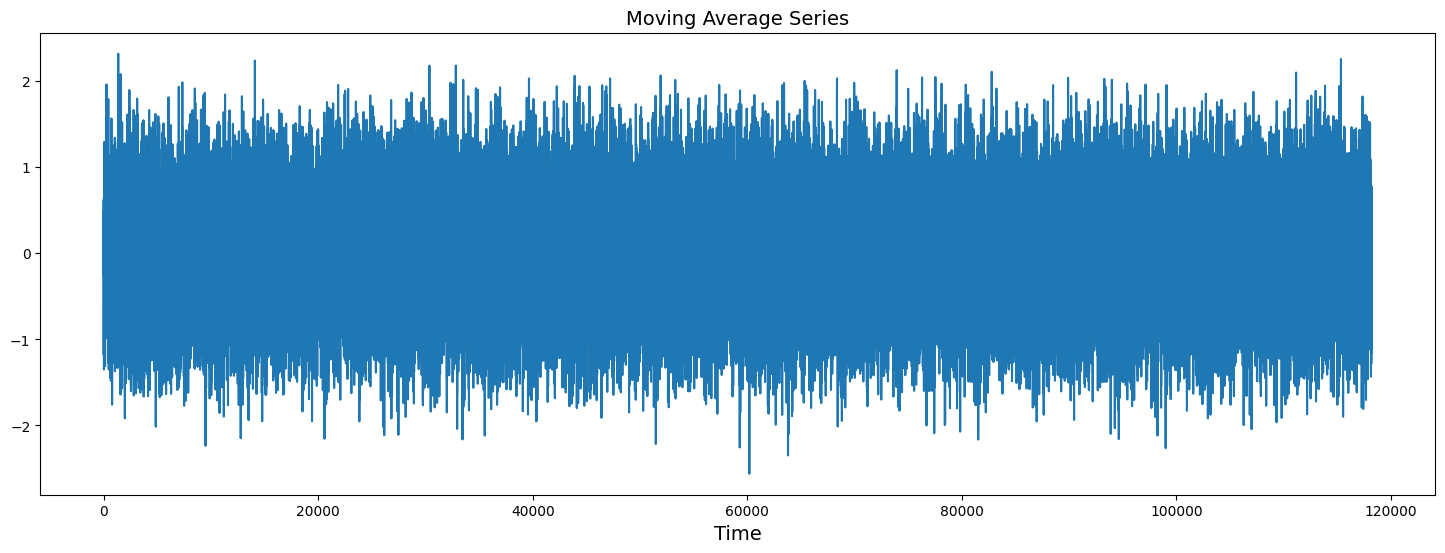

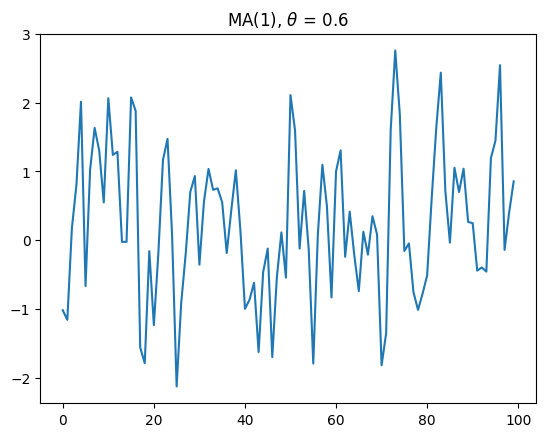

In [ ]:
# Importing Packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess

# Reading Dataset
data = pd.read_csv("/content/Turbine_Data.csv")

# Generating White Noise
mean = 0
std = 1
n = len(data)
white_noise = np.random.normal(mean, std, size=n)

data['WhiteNoise'] = white_noise
w_series = pd.Series(white_noise)

# Applying Moving Average
window_size = 3
windows = w_series.rolling(window_size)
moving_averages = windows.mean()

# Plotting Moving Average Series
plt.figure(figsize=(18, 6))
plt.plot(moving_averages)
plt.title("Moving Average Series", fontsize=14)
plt.xlabel("Time", fontsize=14)
plt.show()

# Simulating ARMA Process
ar1 = np.array([1])
ma1 = np.array([1, 0.6])
data_subset = data['ActivePower'].iloc[:100]
MA_object = ArmaProcess(ar1, ma1)
simulated_data = MA_object.generate_sample(nsample=100)
simulated_series = pd.Series(simulated_data, index=data_subset.index)

# Plotting Simulated MA(1) Series
plt.plot(simulated_series)
plt.title("MA(1), $\\theta$ = 0.6")
plt.show()
